---
# 젤다의 전설 왕국의 눈물 '왕눈 사당' 토픽 분석
---

## 작업 내용
- 토큰화 및 용어 분류 추출
- 토큰 BOW 생성
- 다회 언급 키워드 추출 및 유형 분류
- wordcloud 이미지 + 다이어그램 시각화

# BOW

In [1]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_2370/928192703.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def tokenize(dataFrame):
    okt = Okt()   
    dataFrame['morphs'] = [okt.morphs(content) for content in dataFrame['answers'] if content != "\n"]
    return dataFrame

def noun_tokenize(dataFrame):
    okt = Okt()   
    dataFrame['nouns'] = [okt.nouns(content) for content in dataFrame['answers'] if content != "\n"]
    return dataFrame

def data_preprocessing(dataFrame):
    dataframe = tokenize(dataFrame)
    dataframe = noun_tokenize(dataFrame)
    return dataFrame

In [3]:
df = pd.read_csv('./data/zelda_qna_shrine.csv')
df

,question,answers
0,젤다 왕눈 꼭 모든사당 깨야하나요? 전혀요. 시작의하늘섬에 있는 사당을 제외하면 하...,전혀요. 시작의하늘섬에 있는 사당을 제외하면 하나도 안 깨도 엔딩볼 수 있습니다.
1,젤다 왕눈 꼭 모든사당 깨야하나요? 전혀요. 시작의하늘섬에 있는 사당을 제외하면 하...,아니요 입에서 녹여드셔도 되시지요
2,제가 사당 151개를 깼습니다. 하늘에 위치한 사당과 지저의 뿌리는 다 찾았는데 지...,"안녕하세요?\n하늘섬 다시 확인해 보시겠어요?\n하늘섬에 32개고, 지상은 120개..."
3,... 질문에 대한 답변: 젤다 왕눈 사당에서 152개의 모든 사당을 클리어하고 조...,예 퀘스트를 받지 않고 바로 깬 것입니다\n퀘스트 받으시면 아마 바로 클리어가 될겁...
4,... 질문에 대한 답변: 젤다 왕눈 사당에서 152개의 모든 사당을 클리어하고 조...,게임에 빠져 사는 ᵔᴥᵔ게임광ᵔᴥᵔ‍ 인사드립니다 ꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾\n ...
...,...,...
310,왕눈도 전작 야숨처럼 들어갔다가 덜깨고 나온 사당은 붉은색으로 지도에 워프 표시해주...,"저 같은 경우는 사당을 먼저 많이 깼어요.\n사당을 깨서 스테미나와 하트를 늘리고,..."
311,왕눈도 전작 야숨처럼 들어갔다가 덜깨고 나온 사당은 붉은색으로 지도에 워프 표시해주...,저는 모르고 마지막으로 갔지만 고론 지역이 가장 쉬운 것 같아요.
312,... 한 군데 남으신거 같은데요? 맞나요? 이미지가 작아서 잘은 안보이는데요......,"스크린 샷 찍어서 올리시면 더 좋은 답변이 달릴겁니다. 너무 안보이네요.\n참고로,..."
313,... 한 군데 남으신거 같은데요? 맞나요? 이미지가 작아서 잘은 안보이는데요......,"지상의 사당은 뿌리,\n지상의 물(바다,강등)은\n벽입니다\n제가 보기는 오른쪽 아..."


In [4]:
dataframe = data_preprocessing(df)
dataframe

,question,answers,morphs,nouns
0,젤다 왕눈 꼭 모든사당 깨야하나요? 전혀요. 시작의하늘섬에 있는 사당을 제외하면 하...,전혀요. 시작의하늘섬에 있는 사당을 제외하면 하나도 안 깨도 엔딩볼 수 있습니다.,"[전혀, 요, ., 시작, 의, 하늘, 섬, 에, 있는, 사당, 을, 제외, 하면,...","[전혀, 시작, 하늘, 섬, 사당, 제외, 하나, 안, 엔딩, 볼, 수]"
1,젤다 왕눈 꼭 모든사당 깨야하나요? 전혀요. 시작의하늘섬에 있는 사당을 제외하면 하...,아니요 입에서 녹여드셔도 되시지요,"[아니요, 입, 에서, 녹여, 드셔도, 되시지요]",[입]
2,제가 사당 151개를 깼습니다. 하늘에 위치한 사당과 지저의 뿌리는 다 찾았는데 지...,"안녕하세요?\n하늘섬 다시 확인해 보시겠어요?\n하늘섬에 32개고, 지상은 120개...","[안녕하세요, ?, \n, 하늘, 섬, 다시, 확인, 해, 보시겠어요, ?, \n,...","[하늘, 섬, 다시, 확인, 하늘, 섬, 지상, 개]"
3,... 질문에 대한 답변: 젤다 왕눈 사당에서 152개의 모든 사당을 클리어하고 조...,예 퀘스트를 받지 않고 바로 깬 것입니다\n퀘스트 받으시면 아마 바로 클리어가 될겁...,"[예, 퀘스트, 를, 받지, 않고, 바로, 깬, 것, 입니다, \n, 퀘스트, 받으...","[예, 퀘스트, 바로, 것, 퀘스트, 아마, 바로, 클리어, 어디, 퀘스트, 노가다]"
4,... 질문에 대한 답변: 젤다 왕눈 사당에서 152개의 모든 사당을 클리어하고 조...,게임에 빠져 사는 ᵔᴥᵔ게임광ᵔᴥᵔ‍ 인사드립니다 ꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾\n ...,"[게임, 에, 빠져, 사는, ᵔᴥᵔ, 게임광, ᵔᴥᵔ‍, 인사, 드립니다, ꒰⸝⸝•...","[게임, 게임광, 인사, 최대한, 답변, 질문, 대한, 답변, 젤다, 왕눈, 사당,..."
...,...,...,...,...
310,왕눈도 전작 야숨처럼 들어갔다가 덜깨고 나온 사당은 붉은색으로 지도에 워프 표시해주...,"저 같은 경우는 사당을 먼저 많이 깼어요.\n사당을 깨서 스테미나와 하트를 늘리고,...","[저, 같은, 경우, 는, 사당, 을, 먼저, 많이, 깼어요, ., \n, 사당, ...","[저, 경우, 사당, 먼저, 사당, 스, 테미, 하트, 대요정, 이용, 방어, 다음..."
311,왕눈도 전작 야숨처럼 들어갔다가 덜깨고 나온 사당은 붉은색으로 지도에 워프 표시해주...,저는 모르고 마지막으로 갔지만 고론 지역이 가장 쉬운 것 같아요.,"[저, 는, 모르고, 마지막, 으로, 갔지만, 고론, 지역, 이, 가장, 쉬운, 것...","[저, 마지막, 지역, 가장, 것]"
312,... 한 군데 남으신거 같은데요? 맞나요? 이미지가 작아서 잘은 안보이는데요......,"스크린 샷 찍어서 올리시면 더 좋은 답변이 달릴겁니다. 너무 안보이네요.\n참고로,...","[스크린, 샷, 찍어서, 올리시면, 더, 좋은, 답변, 이, 달릴, 겁니다, ., ...","[스크린, 샷, 더, 답변, 참고, 모든, 저, 파마, 지상, 파마, 사당, 연결,..."
313,... 한 군데 남으신거 같은데요? 맞나요? 이미지가 작아서 잘은 안보이는데요......,"지상의 사당은 뿌리,\n지상의 물(바다,강등)은\n벽입니다\n제가 보기는 오른쪽 아...","[지상, 의, 사당, 은, 뿌리, ,, \n, 지상, 의, 물, (, 바다, ,, ...","[지상, 사당, 뿌리, 지상, 물, 바다, 강등, 은, 벽, 제, 보기, 오른쪽, ..."


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  315 non-null    object
 1   answers   315 non-null    object
 2   morphs    315 non-null    object
 3   nouns     315 non-null    object
dtypes: object(4)
memory usage: 10.0+ KB


In [6]:
def col_to_doc(col):
    combined_list = col.tolist()
    combined_string = sum(combined_list,[])

    return combined_string

In [7]:
doc_noun = col_to_doc(dataframe['nouns'])
doc_noun

['전혀',
 '시작',
 '하늘',
 '섬',
 '사당',
 '제외',
 '하나',
 '안',
 '엔딩',
 '볼',
 '수',
 '입',
 '하늘',
 '섬',
 '다시',
 '확인',
 '하늘',
 '섬',
 '지상',
 '개',
 '예',
 '퀘스트',
 '바로',
 '것',
 '퀘스트',
 '아마',
 '바로',
 '클리어',
 '어디',
 '퀘스트',
 '노가다',
 '게임',
 '게임광',
 '인사',
 '최대한',
 '답변',
 '질문',
 '대한',
 '답변',
 '젤다',
 '왕눈',
 '사당',
 '개',
 '모든',
 '사당',
 '클리어',
 '나우',
 '갑옷',
 '축하',
 '사진',
 '사당',
 '퀘스트',
 '이',
 '로',
 '경우',
 '버그',
 '일',
 '수',
 '원래',
 '퀘스트',
 '때',
 '누락',
 '부분',
 '것일',
 '수',
 '게임',
 '제작사',
 '문의',
 '조치',
 '취',
 '것',
 '가장',
 '것',
 '답변',
 '채택',
 '점',
 '또',
 '추가',
 '질문',
 '맵',
 '보시',
 '클리어',
 '사당',
 '파랑색',
 '표시',
 '클리어',
 '못',
 '사당',
 '파랑색',
 '주황색',
 '표시',
 '상자',
 '표시',
 '내',
 '사당',
 '상자',
 '발견',
 '표시',
 '거',
 '하나',
 '원래',
 '체력',
 '꽉',
 '칸',
 '비어',
 '사당',
 '문',
 '클리어',
 '안',
 '아이콘',
 '테두리',
 '파란색',
 '중앙',
 '주황색',
 '표시',
 '숨',
 '군데',
 '거',
 '이미지',
 '원',
 '친',
 '부분',
 '사당',
 '두',
 '군데',
 '여기',
 '듯',
 '거',
 '거',
 '왕눈',
 '사당',
 '사당',
 '이름',
 '띄어쓰기',
 '의',
 '사당',
 '의',
 '사당',
 '부분',
 '제외',
 '지식인',
 '헛소리',
 '해',
 '차고',
 '때문',


In [8]:
doc_morphs = col_to_doc(dataframe['morphs'])
doc_morphs

['전혀',
 '요',
 '.',
 '시작',
 '의',
 '하늘',
 '섬',
 '에',
 '있는',
 '사당',
 '을',
 '제외',
 '하면',
 '하나',
 '도',
 '안',
 '깨도',
 '엔딩',
 '볼',
 '수',
 '있습니다',
 '.',
 '아니요',
 '입',
 '에서',
 '녹여',
 '드셔도',
 '되시지요',
 '안녕하세요',
 '?',
 '\n',
 '하늘',
 '섬',
 '다시',
 '확인',
 '해',
 '보시겠어요',
 '?',
 '\n',
 '하늘',
 '섬',
 '에',
 '32',
 '개고',
 ',',
 '지상',
 '은',
 '120',
 '개',
 '입니다',
 '.',
 '예',
 '퀘스트',
 '를',
 '받지',
 '않고',
 '바로',
 '깬',
 '것',
 '입니다',
 '\n',
 '퀘스트',
 '받으시면',
 '아마',
 '바로',
 '클리어',
 '가',
 '될',
 '겁니다',
 '\n',
 '(',
 '근데',
 '어디',
 '퀘스트',
 '인',
 '지는',
 '노가다',
 '로',
 '찾아야',
 '합니다',
 ')',
 '게임',
 '에',
 '빠져',
 '사는',
 'ᵔᴥᵔ',
 '게임광',
 'ᵔᴥᵔ\u200d',
 '인사',
 '드립니다',
 '꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾',
 '\n     ',
 '최대한',
 '간결하고',
 '정확한',
 '답변',
 '드려',
 '볼게요',
 '!',
 '\n ',
 '질문',
 '에',
 '대한',
 '답변',
 ':',
 '젤다',
 '왕눈',
 '사당',
 '에서',
 '152',
 '개',
 '의',
 '모든',
 '사당',
 '을',
 '클리어',
 '하고',
 '조',
 '나우',
 '갑옷',
 '을',
 '받으셨다면',
 '축하',
 '드립니다',
 '.',
 '하지만',
 '사진',
 '과',
 '같이',
 '사당',
 '퀘스트',
 '를',
 '보면',
 '31/31',
 '이',
 '아닌',
 '30/31',
 '로',
 '나타나는',

In [9]:
def build_wto_bow_cws(tokenized_document):
    # BoW와 단어집합 만들기 - 객체 선언
    bow = []                                          
    word_to_index = {}                                  
    word_counts = {}
    # Bow와 단어집합 만들기
    for word in tokenized_document:
        if word not in ['!', '.', '', ','] and '\\' not in word:
            if word not in word_to_index.keys():
                word_to_index[word] = len(word_to_index)
                bow.insert(len(word_to_index) - 1, 1)
            else:                                           
                index = word_to_index.get(word)
                bow[index] += 1
    word_counts = {key:bow[idx] for idx,key in enumerate(word_to_index)}
    
    return word_to_index, bow, word_counts

def remove_stop_words(word_counts):
    keys_to_remove = ['이', '것', '수', '게임', '왕눈', '공격', '답변', '젤다', '공략', '방법', '질문', '도움']
    for key in keys_to_remove:
        word_counts.pop(key, None)
    return word_counts

In [10]:
wti_nouns, bow_nouns, word_counts_nouns = build_wto_bow_cws(doc_noun)
word_counts_nouns


{'전혀': 4,
 '시작': 40,
 '하늘': 43,
 '섬': 36,
 '사당': 227,
 '제외': 6,
 '하나': 30,
 '안': 58,
 '엔딩': 14,
 '볼': 6,
 '수': 203,
 '입': 2,
 '다시': 40,
 '확인': 19,
 '지상': 28,
 '개': 64,
 '예': 9,
 '퀘스트': 54,
 '바로': 25,
 '것': 169,
 '아마': 11,
 '클리어': 49,
 '어디': 8,
 '노가다': 1,
 '게임': 186,
 '게임광': 33,
 '인사': 33,
 '최대한': 34,
 '답변': 122,
 '질문': 79,
 '대한': 35,
 '젤다': 105,
 '왕눈': 154,
 '모든': 21,
 '나우': 30,
 '갑옷': 5,
 '축하': 3,
 '사진': 3,
 '이': 50,
 '로': 11,
 '경우': 33,
 '버그': 3,
 '일': 6,
 '원래': 6,
 '때': 54,
 '누락': 2,
 '부분': 16,
 '것일': 1,
 '제작사': 2,
 '문의': 5,
 '조치': 1,
 '취': 1,
 '가장': 15,
 '채택': 45,
 '점': 40,
 '또': 37,
 '추가': 48,
 '맵': 17,
 '보시': 11,
 '파랑색': 2,
 '표시': 17,
 '못': 24,
 '주황색': 4,
 '상자': 16,
 '내': 22,
 '발견': 12,
 '거': 56,
 '체력': 12,
 '꽉': 3,
 '칸': 8,
 '비어': 1,
 '문': 1,
 '아이콘': 2,
 '테두리': 1,
 '파란색': 2,
 '중앙': 11,
 '숨': 111,
 '군데': 16,
 '이미지': 1,
 '원': 6,
 '친': 1,
 '두': 10,
 '여기': 14,
 '듯': 6,
 '이름': 4,
 '띄어쓰기': 1,
 '의': 8,
 '지식인': 1,
 '헛소리': 1,
 '해': 21,
 '차고': 1,
 '때문': 30,
 '보고': 7,
 '를': 12,
 '분할': 1,
 

In [11]:
wti_morphs, bow_morphs, word_counts_morphs = build_wto_bow_cws(doc_morphs)
word_counts_morphs


{'전혀': 4,
 '요': 41,
 '시작': 40,
 '의': 374,
 '하늘': 43,
 '섬': 36,
 '에': 462,
 '있는': 99,
 '사당': 227,
 '을': 523,
 '제외': 6,
 '하면': 72,
 '하나': 30,
 '도': 148,
 '안': 69,
 '깨도': 3,
 '엔딩': 14,
 '볼': 6,
 '수': 203,
 '있습니다': 139,
 '아니요': 1,
 '입': 2,
 '에서': 212,
 '녹여': 1,
 '드셔도': 1,
 '되시지요': 1,
 '안녕하세요': 26,
 '?': 45,
 '\n': 807,
 '다시': 40,
 '확인': 19,
 '해': 55,
 '보시겠어요': 1,
 '32': 4,
 '개고': 2,
 '지상': 28,
 '은': 222,
 '120': 5,
 '개': 64,
 '입니다': 95,
 '예': 10,
 '퀘스트': 54,
 '를': 351,
 '받지': 1,
 '않고': 2,
 '바로': 25,
 '깬': 3,
 '것': 169,
 '받으시면': 1,
 '아마': 11,
 '클리어': 49,
 '가': 301,
 '될': 19,
 '겁니다': 28,
 '(': 140,
 '근데': 7,
 '어디': 8,
 '인': 32,
 '지는': 1,
 '노가다': 1,
 '로': 141,
 '찾아야': 6,
 '합니다': 70,
 ')': 141,
 '게임': 186,
 '빠져': 32,
 '사는': 33,
 'ᵔᴥᵔ': 160,
 '게임광': 33,
 'ᵔᴥᵔ\u200d': 32,
 '인사': 33,
 '드립니다': 43,
 '꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾': 32,
 '\n     ': 45,
 '최대한': 34,
 '간결하고': 32,
 '정확한': 36,
 '답변': 122,
 '드려': 33,
 '볼게요': 32,
 '\n ': 20,
 '질문': 79,
 '대한': 35,
 ':': 83,
 '젤다': 105,
 '왕눈': 154,
 '152': 9,
 '모든': 22,
 '하고

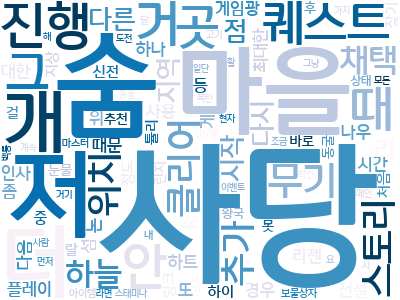

In [12]:
from wordcloud import WordCloud

wc = WordCloud(font_path='/Library/Fonts/paybooc Bold.ttf',background_color='white', max_words=100, width=400, height=300,colormap='PuBu')
word_counts_nouns = remove_stop_words(word_counts_nouns)
cloud_nouns = wc.fit_words(word_counts_nouns)
cloud_nouns.to_image()

In [13]:
word_counts_morphs = remove_stop_words(word_counts_morphs)
word_counts_morphs

{'전혀': 4,
 '요': 41,
 '시작': 40,
 '의': 374,
 '하늘': 43,
 '섬': 36,
 '에': 462,
 '있는': 99,
 '사당': 227,
 '을': 523,
 '제외': 6,
 '하면': 72,
 '하나': 30,
 '도': 148,
 '안': 69,
 '깨도': 3,
 '엔딩': 14,
 '볼': 6,
 '있습니다': 139,
 '아니요': 1,
 '입': 2,
 '에서': 212,
 '녹여': 1,
 '드셔도': 1,
 '되시지요': 1,
 '안녕하세요': 26,
 '?': 45,
 '\n': 807,
 '다시': 40,
 '확인': 19,
 '해': 55,
 '보시겠어요': 1,
 '32': 4,
 '개고': 2,
 '지상': 28,
 '은': 222,
 '120': 5,
 '개': 64,
 '입니다': 95,
 '예': 10,
 '퀘스트': 54,
 '를': 351,
 '받지': 1,
 '않고': 2,
 '바로': 25,
 '깬': 3,
 '받으시면': 1,
 '아마': 11,
 '클리어': 49,
 '가': 301,
 '될': 19,
 '겁니다': 28,
 '(': 140,
 '근데': 7,
 '어디': 8,
 '인': 32,
 '지는': 1,
 '노가다': 1,
 '로': 141,
 '찾아야': 6,
 '합니다': 70,
 ')': 141,
 '빠져': 32,
 '사는': 33,
 'ᵔᴥᵔ': 160,
 '게임광': 33,
 'ᵔᴥᵔ\u200d': 32,
 '인사': 33,
 '드립니다': 43,
 '꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾': 32,
 '\n     ': 45,
 '최대한': 34,
 '간결하고': 32,
 '정확한': 36,
 '드려': 33,
 '볼게요': 32,
 '\n ': 20,
 '대한': 35,
 ':': 83,
 '152': 9,
 '모든': 22,
 '하고': 81,
 '조': 50,
 '나우': 30,
 '갑옷': 5,
 '받으셨다면': 1,
 '축하': 3,
 '하지만': 25,
 '사진': 3

In [14]:
# 이모지 제거
def is_korean_or_allowed_punctuation(char):
    return '\uac00' <= char <= '\ud7a3' or char in ['.', ',', ':', '!', '?']

# Remove newline characters, trim spaces, and keep Korean text and some punctuation
cleaned_morphs = {k.strip(): v for k, v in word_counts_morphs.items() if k.strip()}
cleaned_morphs = {k: v for k, v in cleaned_morphs.items() if all(is_korean_or_allowed_punctuation(c) or c.isdigit() for c in k)}


In [15]:
cleaned_morphs

{'전혀': 4,
 '요': 41,
 '시작': 40,
 '의': 374,
 '하늘': 43,
 '섬': 36,
 '에': 462,
 '있는': 99,
 '사당': 227,
 '을': 523,
 '제외': 6,
 '하면': 72,
 '하나': 30,
 '도': 148,
 '안': 69,
 '깨도': 3,
 '엔딩': 14,
 '볼': 6,
 '있습니다': 139,
 '아니요': 1,
 '입': 2,
 '에서': 212,
 '녹여': 1,
 '드셔도': 1,
 '되시지요': 1,
 '안녕하세요': 26,
 '?': 45,
 '다시': 40,
 '확인': 19,
 '해': 55,
 '보시겠어요': 1,
 '32': 4,
 '개고': 2,
 '지상': 28,
 '은': 222,
 '120': 5,
 '개': 64,
 '입니다': 95,
 '예': 10,
 '퀘스트': 54,
 '를': 351,
 '받지': 1,
 '않고': 2,
 '바로': 25,
 '깬': 3,
 '받으시면': 1,
 '아마': 11,
 '클리어': 49,
 '가': 301,
 '될': 19,
 '겁니다': 28,
 '근데': 7,
 '어디': 8,
 '인': 32,
 '지는': 1,
 '노가다': 1,
 '로': 141,
 '찾아야': 6,
 '합니다': 70,
 '빠져': 32,
 '사는': 33,
 '게임광': 33,
 '인사': 33,
 '드립니다': 43,
 '최대한': 34,
 '간결하고': 32,
 '정확한': 36,
 '드려': 33,
 '볼게요': 32,
 '대한': 35,
 ':': 83,
 '152': 9,
 '모든': 22,
 '하고': 81,
 '조': 50,
 '나우': 30,
 '갑옷': 5,
 '받으셨다면': 1,
 '축하': 3,
 '하지만': 25,
 '사진': 3,
 '과': 62,
 '같이': 6,
 '보면': 27,
 '아닌': 5,
 '나타나는': 2,
 '경우': 33,
 '버그': 3,
 '일': 7,
 '아니면': 7,
 '원래': 6,
 '받을': 2

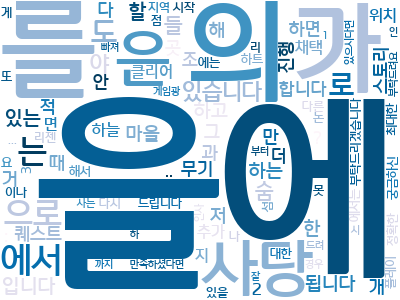

In [16]:
wc = WordCloud(font_path='/Library/Fonts/paybooc Bold.ttf',background_color='white', max_words=100, width=400, height=300,colormap='PuBu')
cleand_morphs = remove_stop_words(cleaned_morphs)
cloud_morphs = wc.fit_words(cleaned_morphs)
cloud_morphs.to_image()

In [17]:
def word_counts_to_df(word_counts):
    df = pd.DataFrame.from_dict(word_counts, orient='index')
    df = df.rename(columns={0:'counts'})
    df = df.reset_index()
    df.sort_values('counts',ascending=False).head(20)
    return df

In [18]:
df_nouns = word_counts_to_df(word_counts_nouns)
df_nouns

,index,counts
0,전혀,4
1,시작,40
2,하늘,43
3,섬,36
4,사당,227
...,...,...
1956,병사,4
1957,기사,4
1958,왕가,4
1959,여덟,2


In [19]:
df_morphs = word_counts_to_df(cleaned_morphs)
df_morphs

,index,counts
0,전혀,4
1,요,41
2,시작,40
3,의,374
4,하늘,43
...,...,...
4006,있던데,2
4007,야할,2
4008,떠도,2
4009,떨어져있는,2


In [20]:
# !pip install openpyxl

In [21]:
df_morphs.to_excel('./data/zelda_qna_shrine_topic_morphs.xlsx',index=False)
df_nouns.to_excel('./data/zelda_qna_shrine_topic_nouns.xlsx',index=False)

# Kiwi

In [22]:
# doc_answers = col_to_doc(dataframe['answers'])
doc_answers = dataframe['answers'].tolist()
doc_answers = " ".join(doc_answers)
doc_answers

'전혀요. 시작의하늘섬에 있는 사당을 제외하면 하나도 안 깨도 엔딩볼 수 있습니다. 아니요 입에서 녹여드셔도 되시지요 안녕하세요?\n하늘섬 다시 확인해 보시겠어요?\n하늘섬에 32개고, 지상은 120개 입니다.  예 퀘스트를 받지 않고 바로 깬 것입니다\n퀘스트 받으시면 아마 바로 클리어가 될겁니다\n(근데 어디 퀘스트인지는 노가다로 찾아야 합니다)    게임에 빠져 사는 ᵔᴥᵔ게임광ᵔᴥᵔ\u200d 인사드립니다 ꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾\n     최대한 간결하고 정확한 답변 드려볼게요!\n 질문에 대한 답변: \n  젤다 왕눈 사당에서 152개의 모든 사당을 클리어하고 조나우 갑옷을 받으셨다면 축하드립니다. 하지만 사진과 같이 사당 퀘스트를 보면 31/31이 아닌 30/31로 나타나는 경우 버그 일 수 있습니다. \n  아니면 원래 퀘스트를 받을 때 누락된 부분이 있는 것일 수 있습니다. 게임 제작사에 문의하여 조치를 취해보시는 것이 가장 좋을 것입니다.\n  ᵔᴥᵔ답변에 만족하셨다면 채택 부탁드려요ᵔᴥᵔ\n      ᵔᴥᵔ궁금하신점이 또 있으시다면 추가질문을 부탁드리겠습니다ᵔᴥᵔ\n  맵보시면 클리어한 사당은 파랑색으로 표시되고\n클리어하지 못한 사당은 파랑색에 주황색으로 표시됩니다.\n상자표시는 내가 사당에 상자를 발견했나 안했나 표시해주는 겁니다. 이거 하나 비었네요 원래 체력은 꽉 못채우고 두칸 비어요 사당 문 열고 클리어를 안 했으면 아이콘 테두리는 파란색, 중앙은 주황색으로 표시됩니다.\n야숨이랑 같아요. 안녕하세요?\n한 군데 남으신거 같은데요? 맞나요? 이미지가 작아서 잘은 안보이는데요...\n빨간 원으로 친 부분에는 사당이 두 군데 입니다. 여기가 맞을 듯 싶네요... 아무리 찾아도 없는 거면 없는 거죠. 왕눈의 사당은 사당 이름에 띄어쓰기가 없어요. ~의 사당에서 의v사당 부분을 제외하면요. 지식인에는 헛소리를 당당하게 해 대는 ai들이 차고 넘치기 때문에 적당히 보고 ai를 구분할 수 있는 능력이 필요합니다.\n다잉 리올의 사당 답변 나온 

In [23]:
# !pip install kiwipiepy

In [24]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

result = kiwi.analyze(doc_answers)
result

a = 0

try:
    for idx, x in enumerate(result):
        print(x)
        a = idx
    print(a)
except:
    pass

    

([Token(form='전혀', tag='MAG', start=0, len=2), Token(form='요', tag='JX', start=2, len=1), Token(form='.', tag='SF', start=3, len=1), Token(form='시작', tag='NNG', start=5, len=2), Token(form='의', tag='JKG', start=7, len=1), Token(form='하늘', tag='NNG', start=8, len=2), Token(form='섬', tag='NNG', start=10, len=1), Token(form='에', tag='JKB', start=11, len=1), Token(form='있', tag='VA', start=13, len=1), Token(form='는', tag='ETM', start=14, len=1), Token(form='사당', tag='NNP', start=16, len=2), Token(form='을', tag='JKO', start=18, len=1), Token(form='제외', tag='NNG', start=20, len=2), Token(form='하', tag='XSV', start=22, len=1), Token(form='면', tag='EC', start=23, len=1), Token(form='하나', tag='NR', start=25, len=2), Token(form='도', tag='JX', start=27, len=1), Token(form='안', tag='MAG', start=29, len=1), Token(form='깨', tag='NNG', start=31, len=1), Token(form='도', tag='JX', start=32, len=1), Token(form='엔딩', tag='NNG', start=34, len=2), Token(form='보', tag='VV', start=36, len=1), Token(form='ᆯ',

In [25]:
result[0][0]

[Token(form='전혀', tag='MAG', start=0, len=2),
 Token(form='요', tag='JX', start=2, len=1),
 Token(form='.', tag='SF', start=3, len=1),
 Token(form='시작', tag='NNG', start=5, len=2),
 Token(form='의', tag='JKG', start=7, len=1),
 Token(form='하늘', tag='NNG', start=8, len=2),
 Token(form='섬', tag='NNG', start=10, len=1),
 Token(form='에', tag='JKB', start=11, len=1),
 Token(form='있', tag='VA', start=13, len=1),
 Token(form='는', tag='ETM', start=14, len=1),
 Token(form='사당', tag='NNP', start=16, len=2),
 Token(form='을', tag='JKO', start=18, len=1),
 Token(form='제외', tag='NNG', start=20, len=2),
 Token(form='하', tag='XSV', start=22, len=1),
 Token(form='면', tag='EC', start=23, len=1),
 Token(form='하나', tag='NR', start=25, len=2),
 Token(form='도', tag='JX', start=27, len=1),
 Token(form='안', tag='MAG', start=29, len=1),
 Token(form='깨', tag='NNG', start=31, len=1),
 Token(form='도', tag='JX', start=32, len=1),
 Token(form='엔딩', tag='NNG', start=34, len=2),
 Token(form='보', tag='VV', start=36, len

In [26]:
words_kiwi = []
for token, pos, start, end in result[0][0]:
    if pos[0] in 'NV':
        words_kiwi.append(f'{token}/{pos}')
words_kiwi

['시작/NNG',
 '하늘/NNG',
 '섬/NNG',
 '있/VA',
 '사당/NNP',
 '제외/NNG',
 '하나/NR',
 '깨/NNG',
 '엔딩/NNG',
 '보/VV',
 '수/NNB',
 '있/VA',
 '입/NNG',
 '녹이/VV',
 '들/VV',
 '되/VV',
 '안녕/NNG',
 '하늘/NNG',
 '섬/NNG',
 '확인/NNG',
 '보/VX',
 '하늘/NNG',
 '섬/NNG',
 '개/NNB',
 '이/VCP',
 '지상/NNG',
 '개/NNB',
 '이/VCP',
 '퀘스트/NNP',
 '받/VV-R',
 '않/VX',
 '깨/VV',
 '것/NNB',
 '이/VCP',
 '퀘스트/NNP',
 '받/VV-R',
 '클리어/NNG',
 '되/VV',
 '거/NNB',
 '이/VCP',
 '어디/NP',
 '퀘스트/NNP',
 '이/VCP',
 '노가다/NNG',
 '찾/VV',
 '하/VX',
 '게임/NNG',
 '빠지/VV',
 '살/VV',
 '게임/NNG',
 '인사/NNG',
 '드리/VV',
 '정확/NNG',
 '답변/NNG',
 '드리/VV',
 '보/VX',
 '질문/NNG',
 '대하/VV',
 '답변/NNG',
 '젤다/NNP',
 '왕/NNP',
 '눌/VV',
 '사당/NNG',
 '개/NNB',
 '사당/NNG',
 '클리어/NNG',
 '조나우/NNG',
 '갑옷/NNG',
 '받/VV-R',
 '축하/NNG',
 '드리/VV',
 '사진/NNG',
 '사당/NNP',
 '퀘스트/NNP',
 '보/VV',
 '아니/VCN',
 '나타나/VV',
 '경우/NNG',
 '버그/NNG',
 '이/VCP',
 '수/NNB',
 '있/VA',
 '퀘스트/NNP',
 '받/VV-R',
 '때/NNG',
 '누락/NNG',
 '부분/NNG',
 '있/VA',
 '것/NNB',
 '이/VCP',
 '수/NNB',
 '있/VA',
 '게임/NNG',
 '제작사/NNG',
 '문의/NNG',
 '조치/NNG',
 

In [27]:
wti_kiwi, bow_kiwi, word_counts_kiwi = build_wto_bow_cws(words_kiwi)
word_counts_kiwi

{'시작/NNG': 41,
 '하늘/NNG': 43,
 '섬/NNG': 34,
 '있/VA': 333,
 '사당/NNP': 31,
 '제외/NNG': 6,
 '하나/NR': 29,
 '깨/NNG': 1,
 '엔딩/NNG': 14,
 '보/VV': 47,
 '수/NNB': 244,
 '입/NNG': 2,
 '녹이/VV': 1,
 '들/VV': 21,
 '되/VV': 163,
 '안녕/NNG': 21,
 '확인/NNG': 19,
 '보/VX': 177,
 '개/NNB': 78,
 '이/VCP': 468,
 '지상/NNG': 29,
 '퀘스트/NNP': 54,
 '받/VV-R': 31,
 '않/VX': 71,
 '깨/VV': 51,
 '것/NNB': 225,
 '클리어/NNG': 49,
 '거/NNB': 170,
 '어디/NP': 8,
 '노가다/NNG': 1,
 '찾/VV': 113,
 '하/VX': 116,
 '게임/NNG': 218,
 '빠지/VV': 39,
 '살/VV': 36,
 '인사/NNG': 33,
 '드리/VV': 135,
 '정확/NNG': 37,
 '답변/NNG': 122,
 '질문/NNG': 75,
 '대하/VV': 38,
 '젤다/NNP': 105,
 '왕/NNP': 14,
 '눌/VV': 22,
 '사당/NNG': 197,
 '조나우/NNG': 17,
 '갑옷/NNG': 5,
 '축하/NNG': 3,
 '사진/NNG': 3,
 '아니/VCN': 69,
 '나타나/VV': 10,
 '경우/NNG': 33,
 '버그/NNG': 3,
 '때/NNG': 53,
 '누락/NNG': 2,
 '부분/NNG': 15,
 '제작사/NNG': 2,
 '문의/NNG': 5,
 '조치/NNG': 1,
 '취하/VV': 2,
 '좋/VA': 60,
 '만족/NNG': 35,
 '채택/NNG': 45,
 '부탁드리/VV': 33,
 '점/NNG': 40,
 '추가/NNG': 48,
 '부탁/NNG': 41,
 '맵보시/NNG': 1,
 '파랑색/NNG': 2,
 '

In [28]:
df_kiwi = word_counts_to_df(word_counts_kiwi)
df_kiwi.sort_values('counts',ascending=False)

,index,counts
19,이/VCP,468
3,있/VA,333
75,하/VV,284
10,수/NNB,244
25,것/NNB,225
...,...,...
2212,반사/NNG,1
2213,미넬/NNP,1
2214,키이스/NNG,1
2215,구타음바치/NNP,1


In [29]:
df_kiwi.to_excel('./data/zelda_qna_shrine_topic_kiwi.xlsx',index=False)

In [30]:
df_kiwi['index'] = df_kiwi['index'].apply(lambda x : x.split("/")[0])
cleaned_kiwi = {key:value for key,value in zip(df_kiwi['index'],df_kiwi['counts'])}
cleaned_kiwi

{'시작': 41,
 '하늘': 43,
 '섬': 1,
 '있': 133,
 '사당': 197,
 '제외': 6,
 '하나': 29,
 '깨': 51,
 '엔딩': 14,
 '보': 1,
 '수': 4,
 '입': 6,
 '녹이': 1,
 '들': 2,
 '되': 163,
 '안녕': 21,
 '확인': 19,
 '개': 1,
 '이': 3,
 '지상': 29,
 '퀘스트': 54,
 '받': 31,
 '않': 71,
 '것': 225,
 '클리어': 49,
 '거': 170,
 '어디': 8,
 '노가다': 1,
 '찾': 113,
 '하': 4,
 '게임': 218,
 '빠지': 39,
 '살': 36,
 '인사': 33,
 '드리': 7,
 '정확': 37,
 '답변': 122,
 '질문': 75,
 '대하': 38,
 '젤다': 105,
 '왕': 149,
 '눌': 22,
 '조나우': 6,
 '갑옷': 5,
 '축하': 3,
 '사진': 3,
 '아니': 69,
 '나타나': 10,
 '경우': 33,
 '버그': 3,
 '때': 53,
 '누락': 2,
 '부분': 15,
 '제작사': 2,
 '문의': 5,
 '조치': 1,
 '취하': 2,
 '좋': 60,
 '만족': 35,
 '채택': 45,
 '부탁드리': 33,
 '점': 1,
 '추가': 48,
 '부탁': 41,
 '맵보시': 1,
 '파랑색': 2,
 '표시': 17,
 '못하': 11,
 '주황색': 4,
 '상자': 39,
 '나': 20,
 '발견': 12,
 '주': 1,
 '이거': 10,
 '비': 5,
 '체력': 12,
 '채우': 10,
 '칸': 8,
 '문': 1,
 '열': 1,
 '아이콘': 2,
 '테두리': 1,
 '파란색': 2,
 '중앙': 11,
 '숨': 3,
 '같': 100,
 '군데': 15,
 '남': 2,
 '맞': 19,
 '이미지': 1,
 '작': 1,
 '보이': 28,
 '빨갛': 4,
 '원': 1,
 '여기': 15,
 '듯'

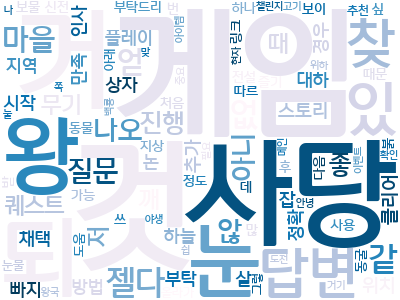

In [31]:
wc = WordCloud(font_path='/Library/Fonts/paybooc Bold.ttf',background_color='white', max_words=100, width=400, height=300,colormap='PuBu')
cloud_kiwi = wc.fit_words(cleaned_kiwi)
cloud_kiwi.to_image()